Lecture 4 task

First, we import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Load and preprocess data

In [2]:
heart_path = 'https://raw.githubusercontent.com/DatenFluss/machine-learning-university-course/main/res/heart.csv'
data = pd.read_csv(heart_path)
X = data.drop('output', axis=1)
y = data['output']

Split the dataset into training and testing sets (80% train, 20% test)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature scaling

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Function we will use to create and train model

In [5]:
def create_and_train_model(input_neurons, hidden_layers, epochs, batch_size):
    model = Sequential()

    # Input layer
    model.add(Dense(input_neurons, input_dim=X_train_scaled.shape[1], activation='relu'))

    # Hidden layers
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_split=0.2,
                        epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

    return model, history, test_accuracy

Function to plot training history

In [6]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Experiment 1: Different number of neurons in the input layer

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5781 - loss: 0.6625 - val_accuracy: 0.7755 - val_loss: 0.5749
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8202 - loss: 0.5510 - val_accuracy: 0.7347 - val_loss: 0.5119
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.4446 - val_accuracy: 0.7755 - val_loss: 0.4457
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8341 - loss: 0.4161 - val_accuracy: 0.8163 - val_loss: 0.4046
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8955 - loss: 0.2925 - val_accuracy: 0.7959 - val_loss: 0.3856
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.3000 - val_accuracy: 0.8367 - val_loss: 0.3738
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9232 - loss: 0.2439 - val_accuracy: 0.8367 - val_loss: 0.3592
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8900 - loss: 0.2666 - val_accuracy: 0.8367 - val_loss: 0.3681
Ep

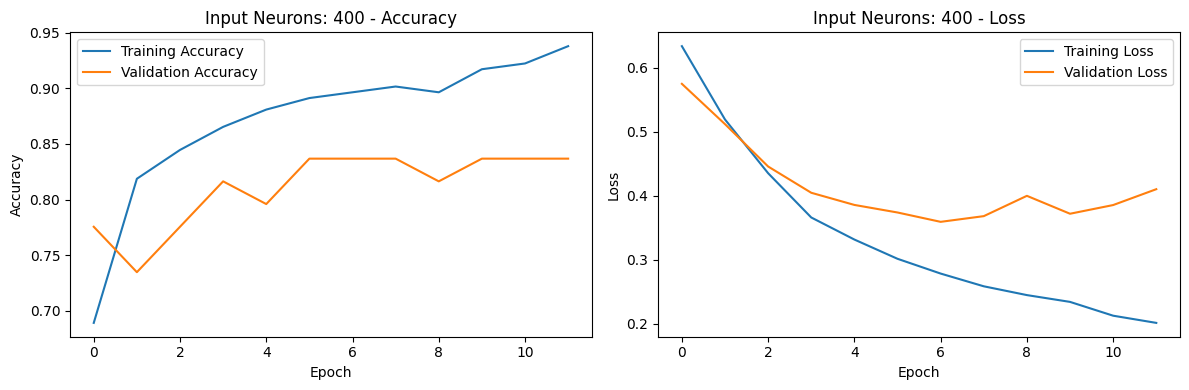

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5722 - loss: 0.6646 - val_accuracy: 0.7755 - val_loss: 0.5464
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8453 - loss: 0.4980 - val_accuracy: 0.7959 - val_loss: 0.4655
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8442 - loss: 0.4083 - val_accuracy: 0.7959 - val_loss: 0.4194
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8649 - loss: 0.3340 - val_accuracy: 0.7959 - val_loss: 0.4036
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9052 - loss: 0.2555 - val_accuracy: 0.7959 - val_loss: 0.3989
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9149 - loss: 0.2315 - val_accuracy: 0.8163 - val_loss: 0.3962
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9221 - loss: 0.2481 - val_accuracy: 0.8163 - val_loss: 0.3681
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9089 - loss: 0.2338 - val_accuracy: 0.8367 - val

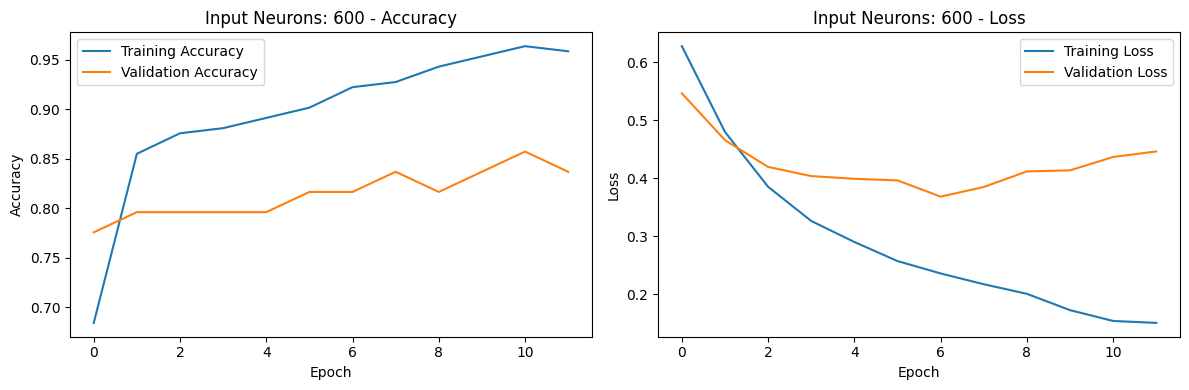

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7068 - loss: 0.6422 - val_accuracy: 0.7755 - val_loss: 0.5414
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8639 - loss: 0.4744 - val_accuracy: 0.7755 - val_loss: 0.4626
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8645 - loss: 0.3701 - val_accuracy: 0.7959 - val_loss: 0.4181
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8811 - loss: 0.3254 - val_accuracy: 0.7755 - val_loss: 0.3792
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8993 - loss: 0.2755 - val_accuracy: 0.8163 - val_loss: 0.3837
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9125 - loss: 0.2630 - val_accuracy: 0.8367 - val_loss: 0.3789
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8672 - loss: 0.2869 - val_accuracy: 0.8367 - val_loss: 0.3886
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9366 - loss: 0.2221 - val_accuracy: 0.8163 - v

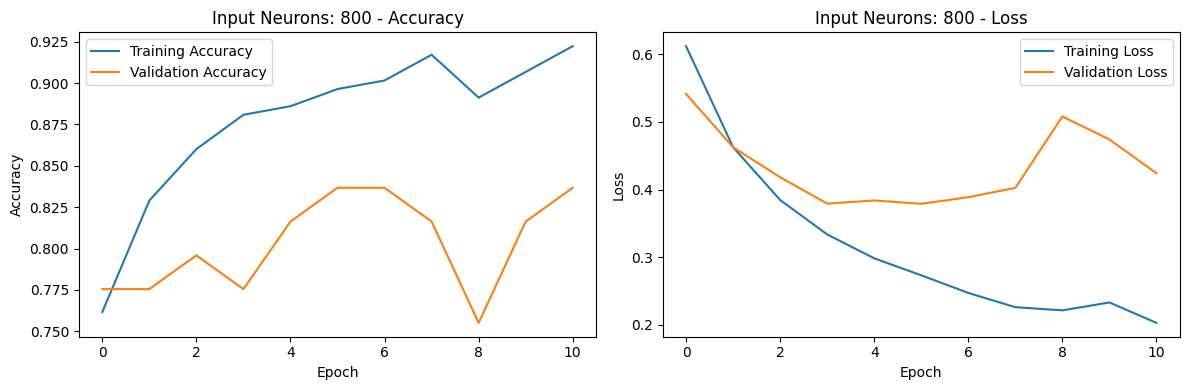

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7144 - loss: 0.6339 - val_accuracy: 0.7959 - val_loss: 0.4839
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8145 - loss: 0.4751 - val_accuracy: 0.7347 - val_loss: 0.4415
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8580 - loss: 0.3874 - val_accuracy: 0.7755 - val_loss: 0.4259
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.3090 - val_accuracy: 0.7959 - val_loss: 0.4038
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - loss: 0.3024 - val_accuracy: 0.7755 - val_loss: 0.4113
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9126 - loss: 0.2572 - val_accuracy: 0.7755 - val_loss: 0.3987
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9250 - loss: 0.2201 - val_accuracy: 0.8163 - val_loss: 0.3941
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9373 - loss: 0.1990 - val_accuracy: 0.8571 - val_loss

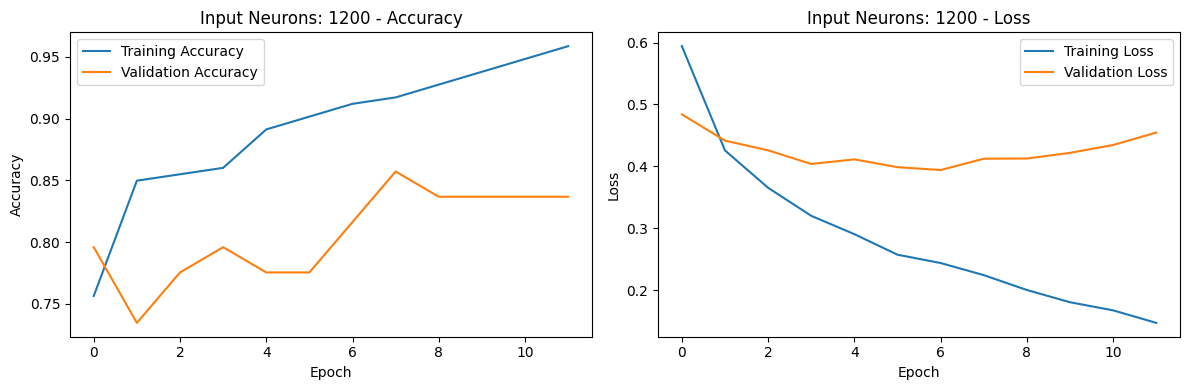

In [7]:
input_neurons_list = [400, 600, 800, 1200]
for neurons in input_neurons_list:
    model, history, test_accuracy = create_and_train_model(neurons, [16, 8], 50, 16)
    print(f"Input neurons: {neurons}, Test Accuracy: {test_accuracy:.4f}")
    plot_history(history, f"Input Neurons: {neurons}")

Experiment 2: Adding a hidden layer with different numbers of neurons

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6158 - loss: 0.6714 - val_accuracy: 0.7755 - val_loss: 0.5588
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7989 - loss: 0.5226 - val_accuracy: 0.8367 - val_loss: 0.4689
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.4609 - val_accuracy: 0.8163 - val_loss: 0.4251
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8812 - loss: 0.3714 - val_accuracy: 0.7959 - val_loss: 0.3918
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8777 - loss: 0.3594 - val_accuracy: 0.7551 - val_loss: 0.4286
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8808 - loss: 0.2968 - val_accuracy: 0.7755 - val_loss: 0.4137
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.2669 - val_accuracy: 0.7755 - val_loss: 0.3843
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.2638 - val_accuracy: 0.7755 - val_loss

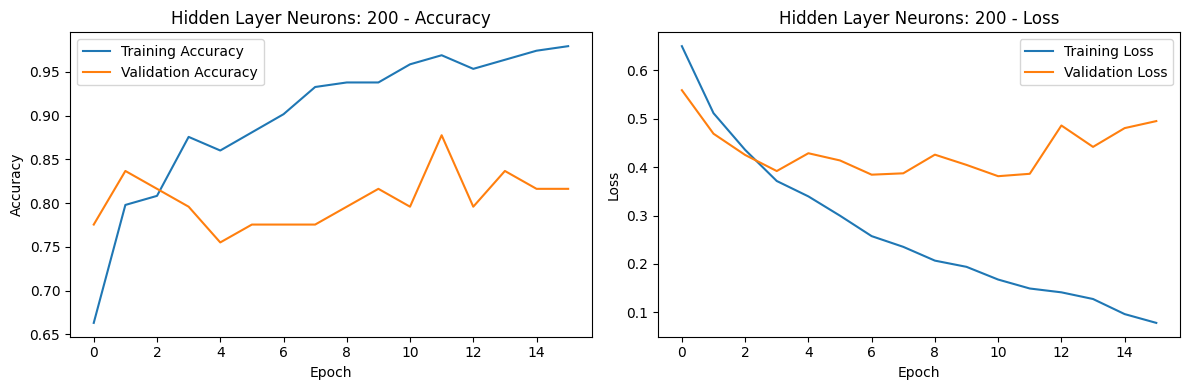

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5892 - loss: 0.6219 - val_accuracy: 0.7347 - val_loss: 0.4346
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8480 - loss: 0.3767 - val_accuracy: 0.8367 - val_loss: 0.4636
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8949 - loss: 0.2849 - val_accuracy: 0.8367 - val_loss: 0.3798
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8922 - loss: 0.2963 - val_accuracy: 0.8367 - val_loss: 0.4103
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9171 - loss: 0.2416 - val_accuracy: 0.7959 - val_loss: 0.4494
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8993 - loss: 0.2486 - val_accuracy: 0.7959 - val_loss: 0.4542
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9349 - loss: 0.1643 - val_accuracy: 0.7959 - val_loss: 0.4684
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9623 - loss: 0.1390 - val_accuracy: 0.7551 - val_loss

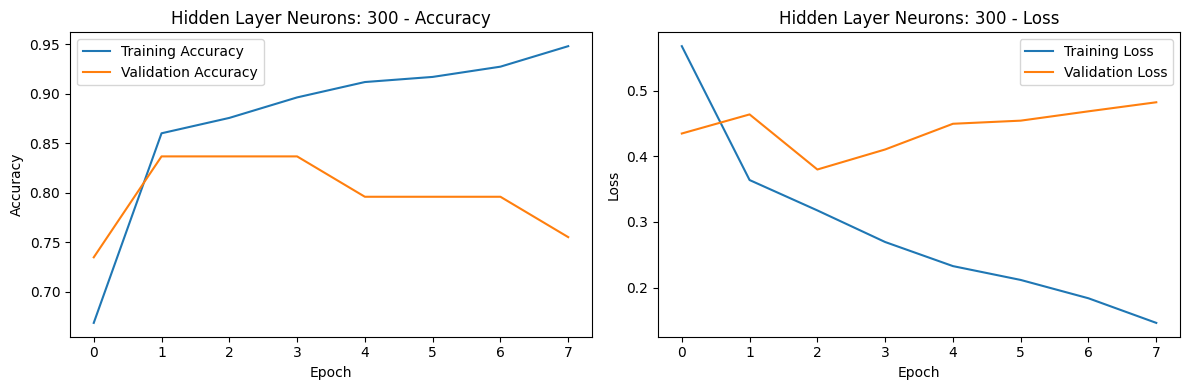

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6778 - loss: 0.6529 - val_accuracy: 0.8367 - val_loss: 0.4733
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8309 - loss: 0.4571 - val_accuracy: 0.8571 - val_loss: 0.3781
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8513 - loss: 0.3398 - val_accuracy: 0.8571 - val_loss: 0.3393
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8442 - loss: 0.3346 - val_accuracy: 0.8571 - val_loss: 0.3326
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.1953 - val_accuracy: 0.8571 - val_loss: 0.3594
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9215 - loss: 0.2270 - val_accuracy: 0.8367 - val_loss: 0.3444
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9292 - loss: 0.2262 - val_accuracy: 0.8571 - val_loss: 0.3694
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9319 - loss: 0.1854 - val_accuracy: 0.8571 - val_loss

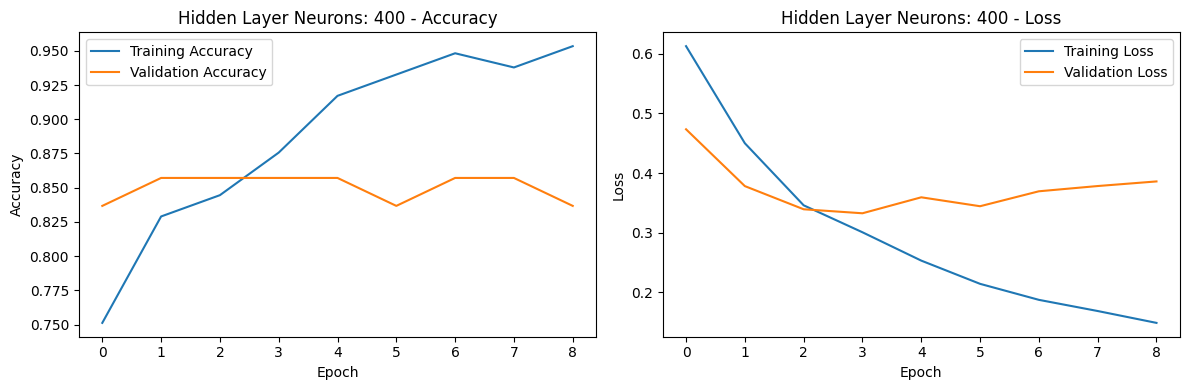

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7075 - loss: 0.6185 - val_accuracy: 0.8367 - val_loss: 0.4430
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8630 - loss: 0.4060 - val_accuracy: 0.8571 - val_loss: 0.3427
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8572 - loss: 0.3465 - val_accuracy: 0.7959 - val_loss: 0.3922
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8814 - loss: 0.2654 - val_accuracy: 0.8163 - val_loss: 0.3725
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9166 - loss: 0.2346 - val_accuracy: 0.8163 - val_loss: 0.3917
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9471 - loss: 0.2163 - val_accuracy: 0.8367 - val_loss: 0.3937
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9210 - loss: 0.2144 - val_accuracy: 0.8367 - val_loss: 0.4287
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8287 - loss: 0.3822
Hidden layer neurons: 600, Test Accuracy: 

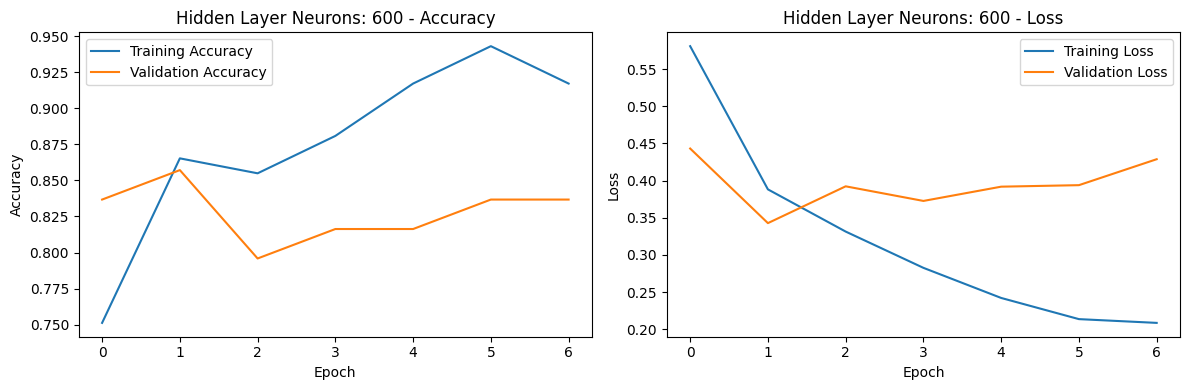

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6333 - loss: 0.6317 - val_accuracy: 0.7959 - val_loss: 0.4193
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8595 - loss: 0.3823 - val_accuracy: 0.7755 - val_loss: 0.4304
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8533 - loss: 0.3597 - val_accuracy: 0.8163 - val_loss: 0.3714
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8836 - loss: 0.2639 - val_accuracy: 0.8163 - val_loss: 0.3989
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8992 - loss: 0.2336 - val_accuracy: 0.7959 - val_loss: 0.4499
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8771 - loss: 0.2281 - val_accuracy: 0.8163 - val_loss: 0.4100
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9512 - loss: 0.1601 - val_accuracy: 0.8163 - val_loss: 0.4462
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9337 - loss: 0.1693 - val_accuracy: 0.7959 - val

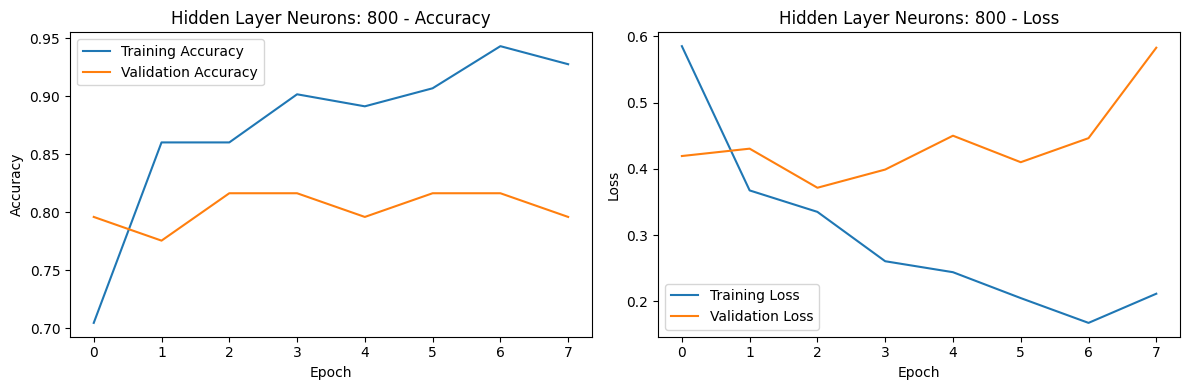

In [8]:
hidden_layer_neurons = [200, 300, 400, 600, 800]
for neurons in hidden_layer_neurons:
    model, history, test_accuracy = create_and_train_model(400, [neurons, 16, 8], 50, 16)
    print(f"Hidden layer neurons: {neurons}, Test Accuracy: {test_accuracy:.4f}")
    plot_history(history, f"Hidden Layer Neurons: {neurons}")

Experiment 3: Adding several hidden layers

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6943 - loss: 0.5980 - val_accuracy: 0.7347 - val_loss: 0.5073
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8091 - loss: 0.3881 - val_accuracy: 0.8367 - val_loss: 0.3701
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8396 - loss: 0.3416 - val_accuracy: 0.8163 - val_loss: 0.3596
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8881 - loss: 0.2547 - val_accuracy: 0.8367 - val_loss: 0.4148
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9188 - loss: 0.2235 - val_accuracy: 0.8367 - val_loss: 0.3764
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9594 - loss: 0.1357 - val_accuracy: 0.8163 - val_loss: 0.5453
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9754 - loss: 0.0806 - val_accuracy: 0.7959 - val_loss: 0.6365
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9703 - loss: 0.1025 - val_accuracy: 0.8367 - val_lo

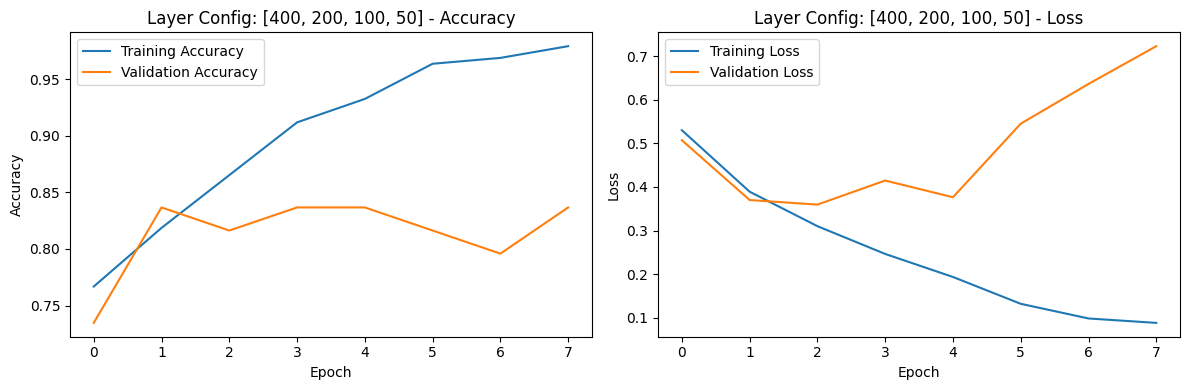

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6752 - loss: 0.6257 - val_accuracy: 0.7959 - val_loss: 0.4730
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8242 - loss: 0.4511 - val_accuracy: 0.8571 - val_loss: 0.3699
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8961 - loss: 0.2761 - val_accuracy: 0.8776 - val_loss: 0.4009
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9234 - loss: 0.2120 - val_accuracy: 0.8163 - val_loss: 0.4062
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9295 - loss: 0.2362 - val_accuracy: 0.8367 - val_loss: 0.4941
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9400 - loss: 0.1636 - val_accuracy: 0.7755 - val_loss: 0.4654
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9211 - loss: 0.1622 - val_accuracy: 0.7959 - val_loss: 0.5249
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8714 - loss: 0.4263
Layer configuration: [600, 400, 200, 10

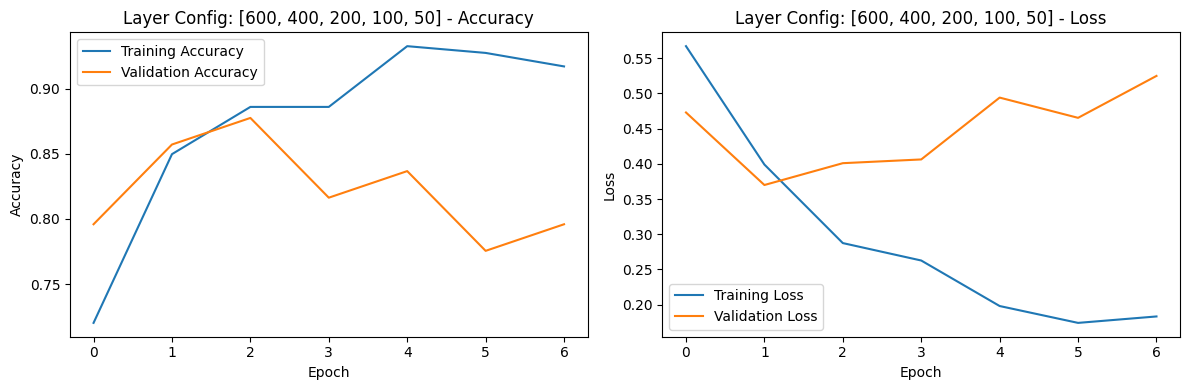

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6674 - loss: 0.6100 - val_accuracy: 0.7551 - val_loss: 0.4653
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7739 - loss: 0.4466 - val_accuracy: 0.7551 - val_loss: 0.4119
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8906 - loss: 0.3167 - val_accuracy: 0.7959 - val_loss: 0.4521
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8919 - loss: 0.2437 - val_accuracy: 0.8163 - val_loss: 0.3953
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9127 - loss: 0.2307 - val_accuracy: 0.8367 - val_loss: 0.3809
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9575 - loss: 0.1408 - val_accuracy: 0.7959 - val_loss: 0.5569
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9535 - loss: 0.1098 - val_accuracy: 0.7755 - val_loss: 0.7940
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9344 - loss: 0.2954 - val_accuracy: 0.7959 - v

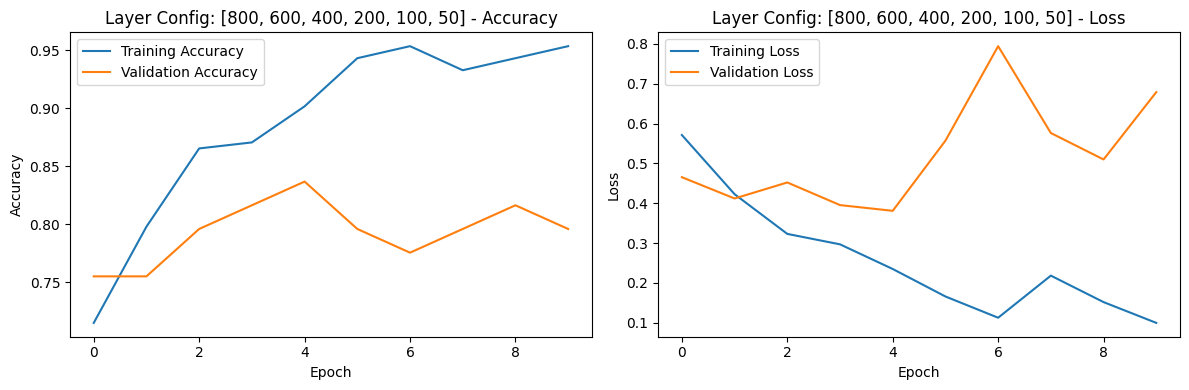

In [9]:
layer_configurations = [
    [400, 200, 100, 50],
    [600, 400, 200, 100, 50],
    [800, 600, 400, 200, 100, 50]
]
for config in layer_configurations:
    model, history, test_accuracy = create_and_train_model(400, config, 50, 16)
    print(f"Layer configuration: {config}, Test Accuracy: {test_accuracy:.4f}")
    plot_history(history, f"Layer Config: {config}")

Experiment 4: Different number of epochs

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5641 - loss: 0.6555 - val_accuracy: 0.6939 - val_loss: 0.4845
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8414 - loss: 0.3962 - val_accuracy: 0.7551 - val_loss: 0.3975
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8488 - loss: 0.3302 - val_accuracy: 0.8163 - val_loss: 0.4278
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8797 - loss: 0.2692 - val_accuracy: 0.8367 - val_loss: 0.3621
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8745 - loss: 0.2620 - val_accuracy: 0.8163 - val_loss: 0.3561
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9278 - loss: 0.2264 - val_accuracy: 0.8367 - val_loss: 0.4399
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9424 - loss: 0.1318 - val_accuracy: 0.8163 - val_loss: 0.4370
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.1027 - val_accuracy: 0.7959 - val_lo

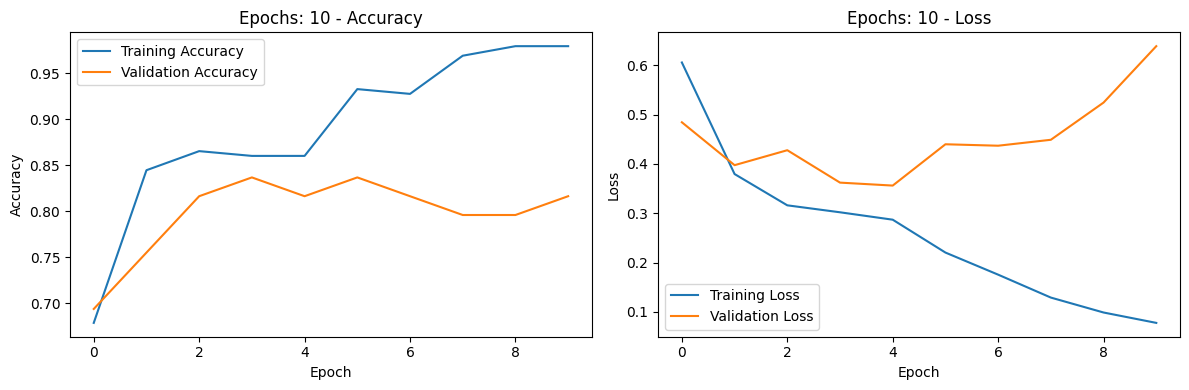

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7067 - loss: 0.6352 - val_accuracy: 0.8367 - val_loss: 0.4404
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8765 - loss: 0.4028 - val_accuracy: 0.8163 - val_loss: 0.3786
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.2829 - val_accuracy: 0.8367 - val_loss: 0.3869
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9081 - loss: 0.2480 - val_accuracy: 0.8163 - val_loss: 0.3914
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9067 - loss: 0.2233 - val_accuracy: 0.8163 - val_loss: 0.4318
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9496 - loss: 0.1559 - val_accuracy: 0.7959 - val_loss: 0.4675
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9547 - loss: 0.1459 - val_accuracy: 0.7959 - val_loss: 0.5918
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8069 - loss: 0.4078
Epochs: 15, Test Accuracy: 0.8197


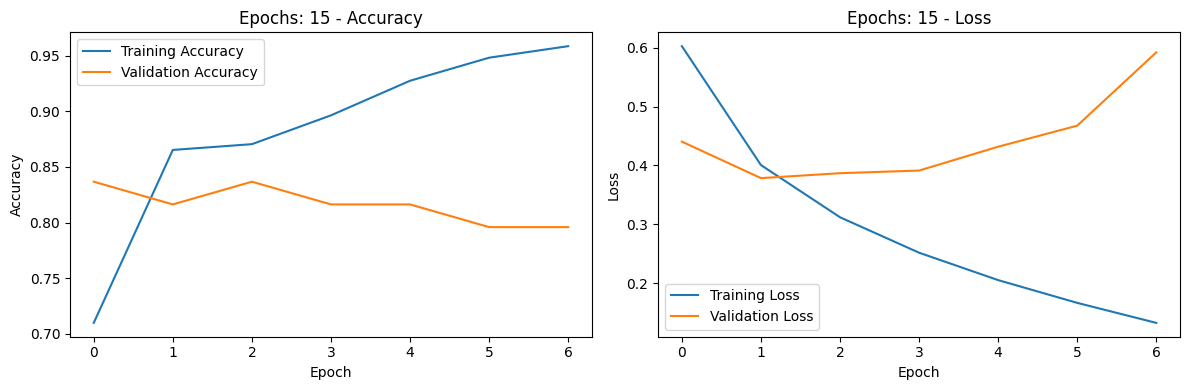

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7221 - loss: 0.6253 - val_accuracy: 0.7959 - val_loss: 0.4511
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7612 - loss: 0.4432 - val_accuracy: 0.8163 - val_loss: 0.3734
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8708 - loss: 0.3486 - val_accuracy: 0.7959 - val_loss: 0.4450
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8722 - loss: 0.2719 - val_accuracy: 0.8367 - val_loss: 0.3862
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9311 - loss: 0.1875 - val_accuracy: 0.7959 - val_loss: 0.4636
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9086 - loss: 0.2781 - val_accuracy: 0.7959 - val_loss: 0.4839
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9587 - loss: 0.1724 - val_accuracy: 0.8163 - val_loss: 0.5140
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.4111 
Epochs: 20, Test Accuracy: 0.8689


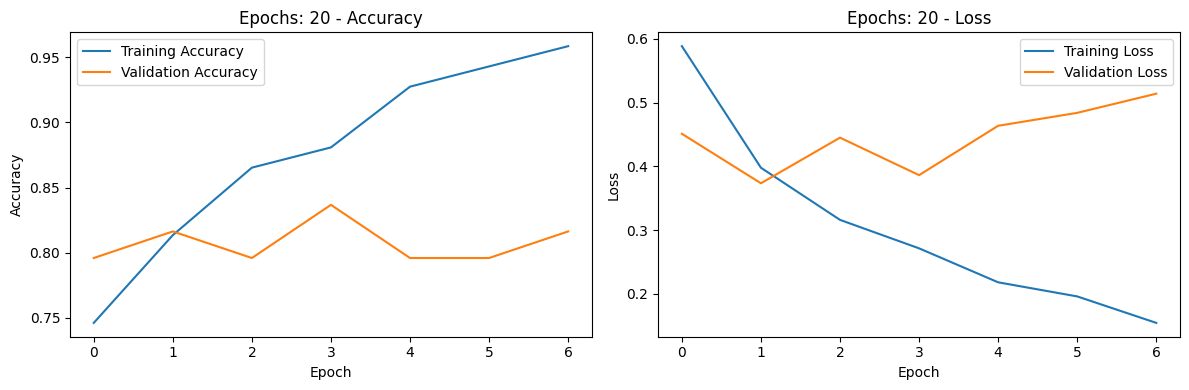

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7703 - loss: 0.6234 - val_accuracy: 0.7755 - val_loss: 0.4315
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8727 - loss: 0.3380 - val_accuracy: 0.7755 - val_loss: 0.4475
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8725 - loss: 0.3272 - val_accuracy: 0.8367 - val_loss: 0.3720
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.2272 - val_accuracy: 0.8367 - val_loss: 0.4162
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8982 - loss: 0.2590 - val_accuracy: 0.8163 - val_loss: 0.3940
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9107 - loss: 0.2314 - val_accuracy: 0.7755 - val_loss: 0.4864
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9396 - loss: 0.1804 - val_accuracy: 0.8367 - val_loss: 0.4092
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9364 - loss: 0.1721 - val_accuracy: 0.8163 - val_lo

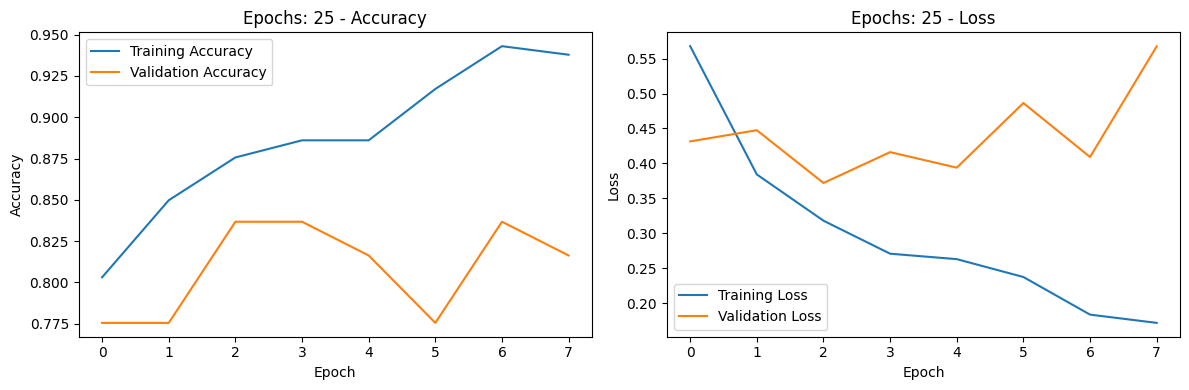

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6255 - loss: 0.6390 - val_accuracy: 0.7755 - val_loss: 0.4457
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8363 - loss: 0.3993 - val_accuracy: 0.7755 - val_loss: 0.3831
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8505 - loss: 0.3406 - val_accuracy: 0.8367 - val_loss: 0.3416
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.2491 - val_accuracy: 0.8367 - val_loss: 0.3479
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.2702 - val_accuracy: 0.8571 - val_loss: 0.3891
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.2210 - val_accuracy: 0.7959 - val_loss: 0.3687
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9185 - loss: 0.2386 - val_accuracy: 0.8163 - val_loss: 0.5001
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9511 - loss: 0.1527 - val_accuracy: 0.8367 - val_loss

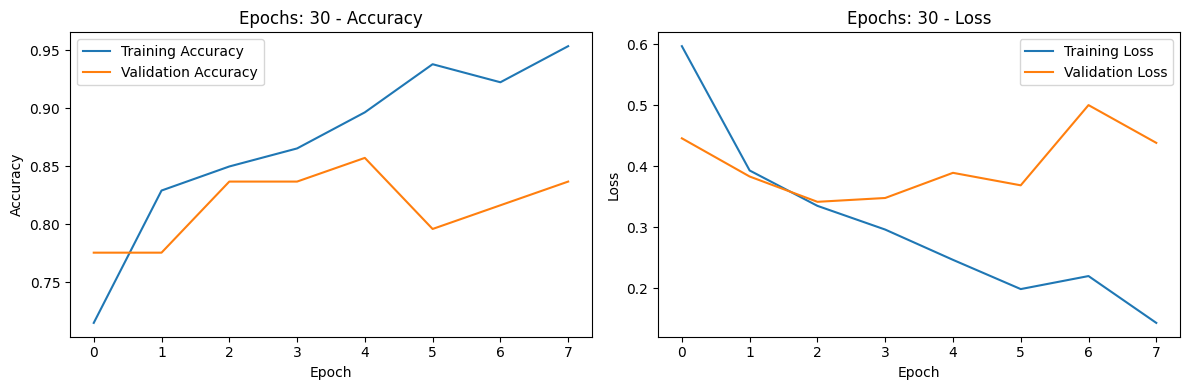

In [10]:
epoch_list = [10, 15, 20, 25, 30]
for epochs in epoch_list:
    model, history, test_accuracy = create_and_train_model(400, [200, 100, 50], epochs, 16)
    print(f"Epochs: {epochs}, Test Accuracy: {test_accuracy:.4f}")
    plot_history(history, f"Epochs: {epochs}")

Experiment 5: Different mini-batch sizes

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6987 - loss: 0.6132 - val_accuracy: 0.7959 - val_loss: 0.4150
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.3627 - val_accuracy: 0.7959 - val_loss: 0.3881
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8946 - loss: 0.2660 - val_accuracy: 0.7551 - val_loss: 0.4995
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8788 - loss: 0.2334 - val_accuracy: 0.8367 - val_loss: 0.3998
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9122 - loss: 0.2231 - val_accuracy: 0.8163 - val_loss: 0.4631
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9595 - loss: 0.1470 - val_accuracy: 0.7959 - val_loss: 0.5865
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9716 - loss: 0.0875 - val_accuracy: 0.7959 - val_loss: 0.6229
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7855 - loss: 0.4699 
Batch size: 10, Test Accuracy: 0.8033


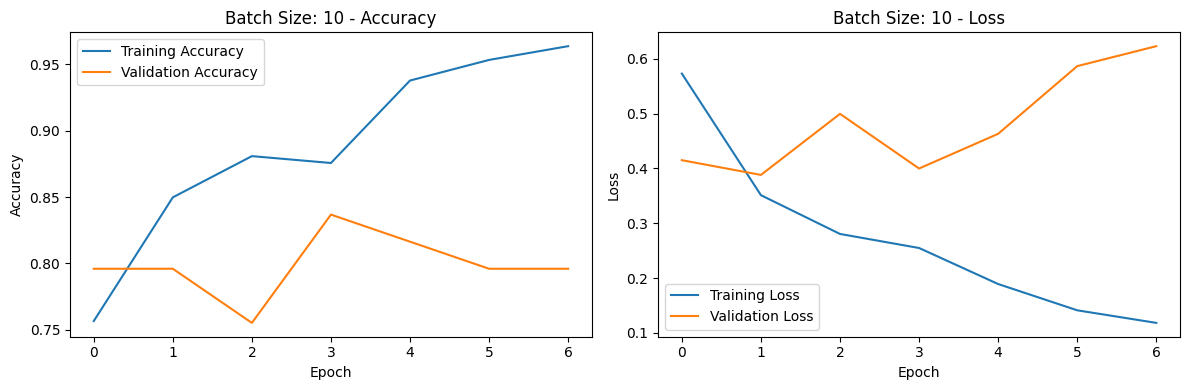

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.6262 - loss: 0.6672 - val_accuracy: 0.7755 - val_loss: 0.5508
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8331 - loss: 0.5221 - val_accuracy: 0.7755 - val_loss: 0.4388
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8701 - loss: 0.4038 - val_accuracy: 0.7959 - val_loss: 0.3915
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8600 - loss: 0.3179 - val_accuracy: 0.7959 - val_loss: 0.3735
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8977 - loss: 0.2580 - val_accuracy: 0.7755 - val_loss: 0.3903
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8947 - loss: 0.2843 - val_accuracy: 0.8367 - val_loss: 0.3653
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9151 - loss: 0.2435 - val_accuracy: 0.8163 - val_loss: 0.3631
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9527 - loss: 0.1828 - val_accuracy: 0.8367 - val_loss: 0.3728

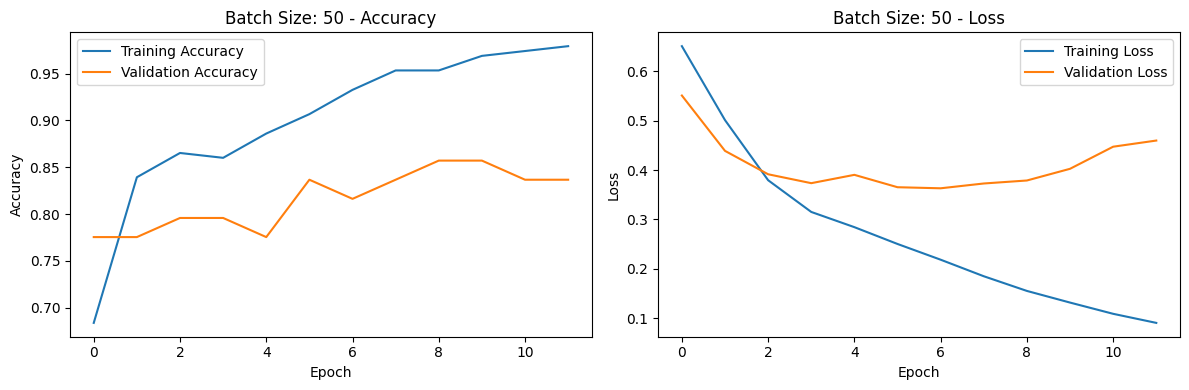

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.5629 - loss: 0.6836 - val_accuracy: 0.7347 - val_loss: 0.6198
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7442 - loss: 0.6003 - val_accuracy: 0.7755 - val_loss: 0.5658
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8021 - loss: 0.5415 - val_accuracy: 0.8163 - val_loss: 0.5142
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8297 - loss: 0.4874 - val_accuracy: 0.7755 - val_loss: 0.4714
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8464 - loss: 0.4123 - val_accuracy: 0.7959 - val_loss: 0.4407
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8702 - loss: 0.3694 - val_accuracy: 0.7959 - val_loss: 0.4245
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8669 - loss: 0.3367 - val_accuracy: 0.7551 - val_loss: 0.4311
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8670 - loss: 0.3073 - val_accuracy: 0.7551 - val_loss: 0.4279

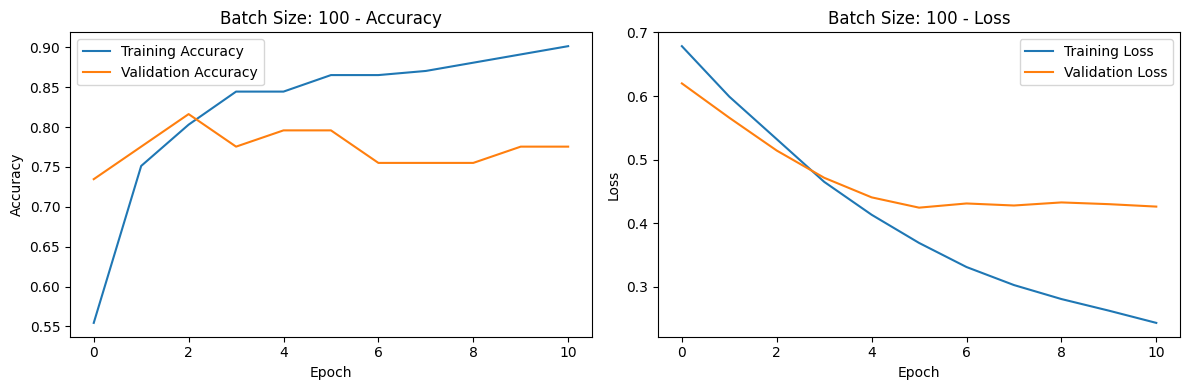

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4974 - loss: 0.6907 - val_accuracy: 0.8367 - val_loss: 0.6475
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.8290 - loss: 0.6499 - val_accuracy: 0.8367 - val_loss: 0.6153
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8601 - loss: 0.6125 - val_accuracy: 0.8163 - val_loss: 0.5820
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8394 - loss: 0.5744 - val_accuracy: 0.7959 - val_loss: 0.5484
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8601 - loss: 0.5349 - val_accuracy: 0.7755 - val_loss: 0.5165
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8653 - loss: 0.4952 - val_accuracy: 0.7755 - val_loss: 0.4863
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8601 - loss: 0.4565 - val_accuracy: 0.7959 - val_loss: 0.4586
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8653 - loss: 0.4196 - val_accuracy: 0.7959 - val_loss: 0.4330


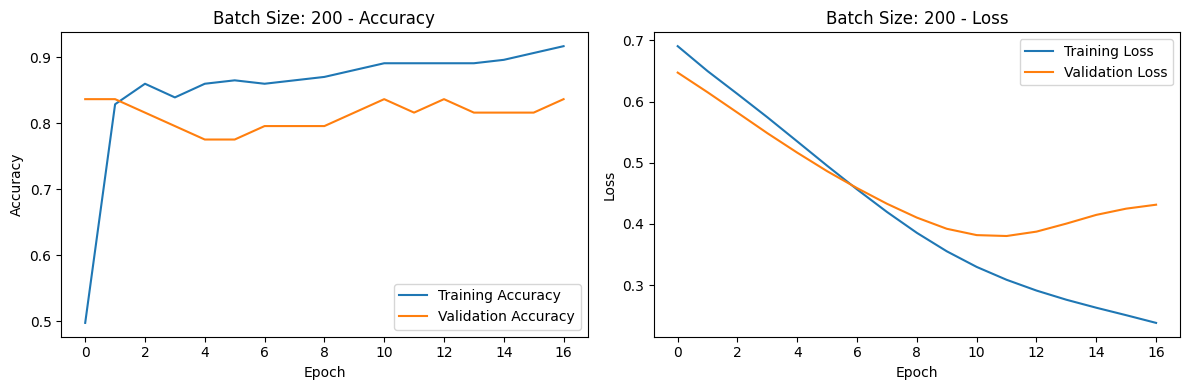

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4663 - loss: 0.7042 - val_accuracy: 0.7959 - val_loss: 0.6453
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7668 - loss: 0.6471 - val_accuracy: 0.7755 - val_loss: 0.6019
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8031 - loss: 0.5972 - val_accuracy: 0.7755 - val_loss: 0.5555
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8394 - loss: 0.5471 - val_accuracy: 0.7959 - val_loss: 0.5092
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8497 - loss: 0.4970 - val_accuracy: 0.8163 - val_loss: 0.4659
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8549 - loss: 0.4498 - val_accuracy: 0.8367 - val_loss: 0.4283
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8601 - loss: 0.4076 - val_accuracy: 0.8571 - val_loss: 0.3991
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8549 - loss: 0.3720 - val_accuracy: 0.8571 - val_loss: 0.378

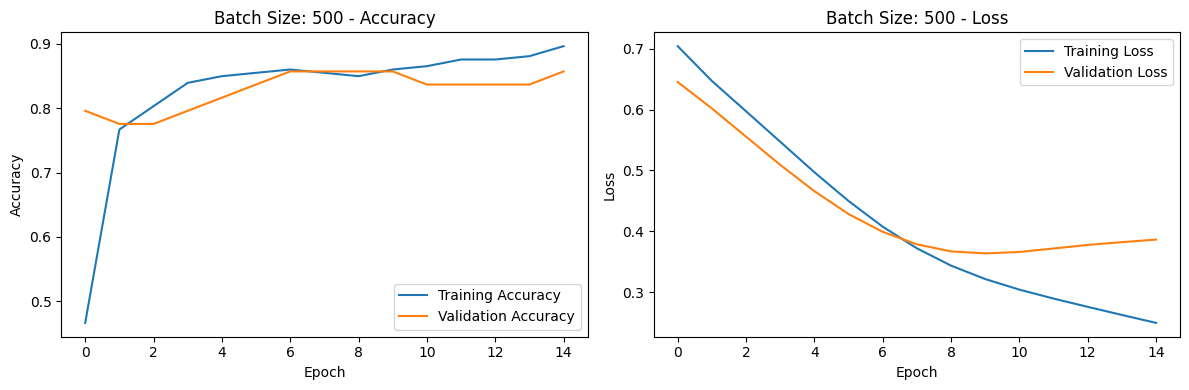

In [11]:
batch_sizes = [10, 50, 100, 200, 500]
for batch_size in batch_sizes:
    model, history, test_accuracy = create_and_train_model(400, [200, 100, 50], 50, batch_size)
    print(f"Batch size: {batch_size}, Test Accuracy: {test_accuracy:.4f}")
    plot_history(history, f"Batch Size: {batch_size}")

Best model based on experiments

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4560 - loss: 0.6983 - val_accuracy: 0.8163 - val_loss: 0.6531
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.7772 - loss: 0.6543 - val_accuracy: 0.8367 - val_loss: 0.6183
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8238 - loss: 0.6175 - val_accuracy: 0.8163 - val_loss: 0.5824
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8342 - loss: 0.5809 - val_accuracy: 0.8367 - val_loss: 0.5443
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8290 - loss: 0.5427 - val_accuracy: 0.8367 - val_loss: 0.5057
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8290 - loss: 0.5034 - val_accuracy: 0.8367 - val_loss: 0.4682
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8342 - loss: 0.4639 - val_accuracy: 0.8367 - val_loss: 0.4349
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8549 - loss: 0.4260 - val_accuracy: 0.8571 - val_loss: 0.

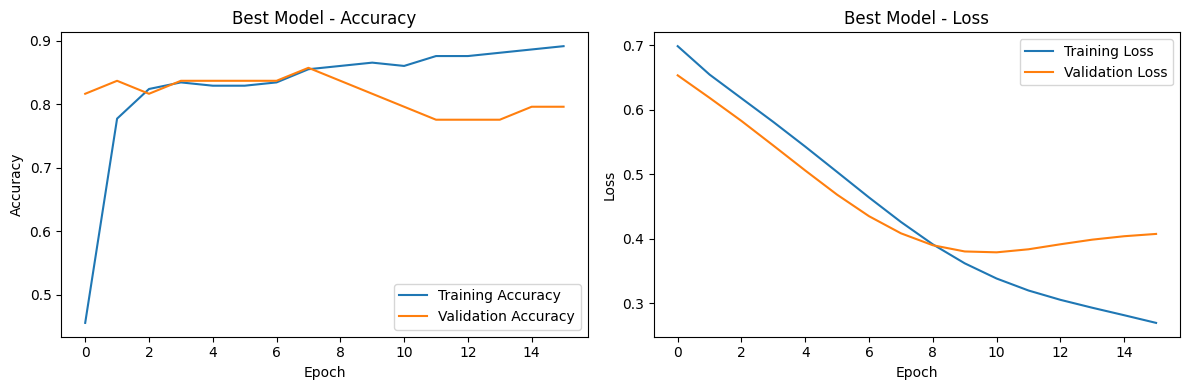

In [15]:
best_model, best_history, best_accuracy = create_and_train_model(400, [200, 100, 50], 50, 200)
print(f"Best model Test Accuracy: {best_accuracy:.4f}")
plot_history(best_history, "Best Model")